In [6]:
import pandas as pd
import numpy as np
import mne
import glob

from EegHelper.EegData import EegDataPoint, EegDataset, files_to_datapoints
from EegHelper.DataIO import DataBuilder, split_main_data

%matplotlib inline

#Following two are so that external files are auto loaded after edit
%load_ext autoreload
%autoreload 2
#mne outputs so much stuff, so just set log level
mne.set_log_level('error')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#DO NOT RUN IF YOU DO NOT WANT TO GENERATE NEW DATA
#data_path = './MindBigData-EP-v1.0/EP1.01.txt'
#split_main_data(data_path=data_path, output_folder='./MindBigData-EP-v1.0')

Load the files, get the points and the list of labels

In [7]:
files = glob.glob('./MindBigData-EP-v1.0/*.csv')
all_points, all_labels = files_to_datapoints(files, first_n=1000) #First 500 by default

In [8]:
print("Num points:", len(all_points))
print("Num labels:", len(all_labels))
print("Labels:", all_labels)

Num points: 782
Num labels: 10
Labels: ['5', '8', '2', '9', '6', '4', '3', '7', '0', '1']


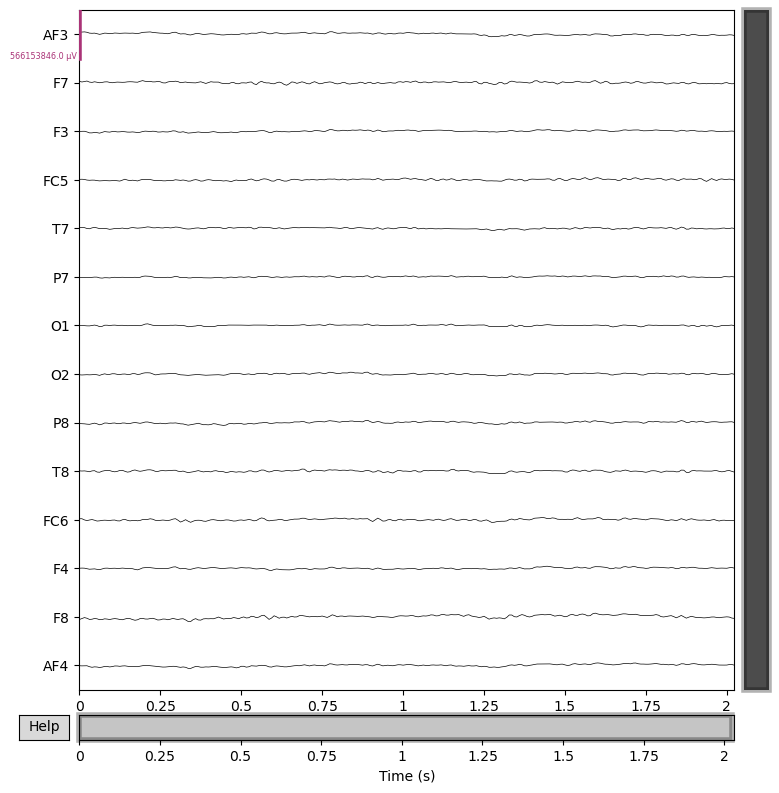

In [11]:
all_points[678].mne_object.plot(scalings = 'auto'); #Pre-cleaning

In [18]:
"""
We will loop through every data point and call the cleaning method.
This filters the frequencies to be only between the ranges. We want 3 - 30 because this is where relevant alpha theta, beta bands lie.
MNE says to multiply the lowpass by 1/3.
"""
for point in all_points:
    point.filter_mne(1, 30)    #We want 3-30 so multiply 3 by 1/3

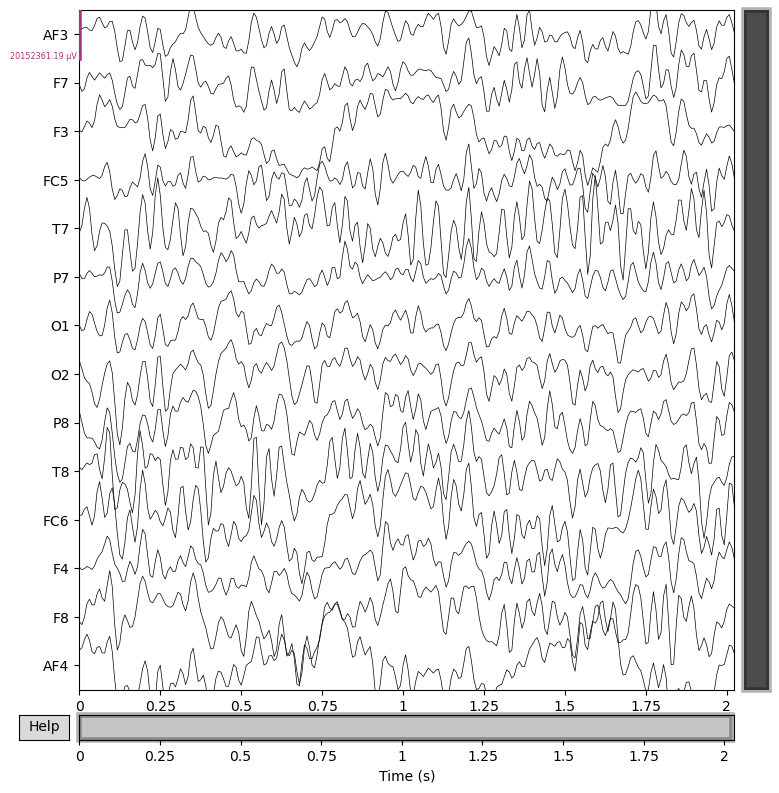

In [19]:
#Quick visual representation of the time series
all_points[48].mne_object.plot(scalings='auto');